In [76]:
import matplotlib.pyplot as plt
import numpy as np

In [77]:
fpaths = "../testes_seq_paral/test_greff_tudo_test_new_n/"

nucleos = 4

sizes = ["small", "medium", "large"]
threads = [2, 4, 8, 16]
threads_mpi_pthreads = [4, 6, 8, 10, 14, 18]
speedups = []

In [78]:
sequenciais = []

for i in sizes:
    sequencial_local = []
    with open(f"{fpaths}logs_sequencial/log_seq_{i}_out.txt", "r") as arquivo:
        for linha in arquivo:
            if "seconds time elapsed" in linha:
                aux = linha.split("seconds")
                aux = aux[0]
                aux = float(aux.replace(",", "."))
                sequencial_local.append(float(aux))
    sequenciais.append(np.mean(sequencial_local))

In [79]:
paralelos_pthread = []

for i in sizes:
    for j in threads:
        paralelo_local = []
        with open(f"{fpaths}logs_paralelo/log_paralelo_{i}_{j}_out.txt", "r") as arquivo:
            for linha in arquivo:
                if "seconds time elapsed" in linha:
                    aux = linha.split("seconds")
                    aux = aux[0]
                    aux = float(aux.replace(",", "."))
                    paralelo_local.append(float(aux))
        paralelos_pthread.append(np.mean(paralelo_local))

In [80]:
paralelos_mpi = []

for i in sizes:
    for j in threads:
        paralelo_local = []
        with open(f"{fpaths}logs_mpi/log_paralelo_{i}_{j}_out.txt", "r") as arquivo:
            for linha in arquivo:
                if "seconds time elapsed" in linha:
                    aux = linha.split("seconds")
                    aux = aux[0]
                    aux = float(aux.replace(",", "."))
                    paralelo_local.append(float(aux))
        paralelos_mpi.append(np.mean(paralelo_local))

In [81]:
pthreads_mpi = []

for i in sizes:
    for j in threads_mpi_pthreads:
        paralelo_local = []
        with open(f"{fpaths}logs_pthread_mpi/log_pthread_mpi_{i}_{j}_out.txt", "r") as arquivo:
            for linha in arquivo:
                if "seconds time elapsed" in linha:
                    aux = linha.split("seconds")
                    aux = aux[0]
                    aux = float(aux.replace(",", "."))
                    paralelo_local.append(float(aux))
        pthreads_mpi.append(np.mean(paralelo_local))

In [82]:
speedups_pthreads = []

aux = 0
speedup_local = [sequenciais[0] / paralelos_pthread[i] for i in range(aux,len(threads))] 
speedups_pthreads.append(speedup_local)
aux += len(threads)
speedup_local = [sequenciais[1] / paralelos_pthread[i] for i in range(aux,aux+len(threads))] 
speedups_pthreads.append(speedup_local)
aux += len(threads)
speedup_local = [sequenciais[2] / paralelos_pthread[i] for i in range(aux,aux+len(threads))]
speedups_pthreads.append(speedup_local)

In [83]:
speedups_mpi = []

aux = 0
speedup_local = [sequenciais[0] / paralelos_mpi[i] for i in range(aux,len(threads))] 
speedups_mpi.append(speedup_local)
aux += len(threads)
speedup_local = [sequenciais[1] / paralelos_mpi[i] for i in range(aux,aux+len(threads))] 
speedups_mpi.append(speedup_local)
aux += len(threads)
speedup_local = [sequenciais[2] / paralelos_mpi[i] for i in range(aux,aux+len(threads))]
speedups_mpi.append(speedup_local)

In [84]:
speedups_mpi_pthreads = []

aux = 0
speedup_local = [sequenciais[0] / pthreads_mpi[i] for i in range(aux,len(threads_mpi_pthreads))] 
speedups_mpi_pthreads.append(speedup_local)
aux += len(threads_mpi_pthreads)
speedup_local = [sequenciais[1] / pthreads_mpi[i] for i in range(aux,aux+len(threads_mpi_pthreads))] 
speedups_mpi_pthreads.append(speedup_local)
aux += len(threads_mpi_pthreads)
speedup_local = [sequenciais[2] / pthreads_mpi[i] for i in range(aux,aux+len(threads_mpi_pthreads))]
speedups_mpi_pthreads.append(speedup_local)

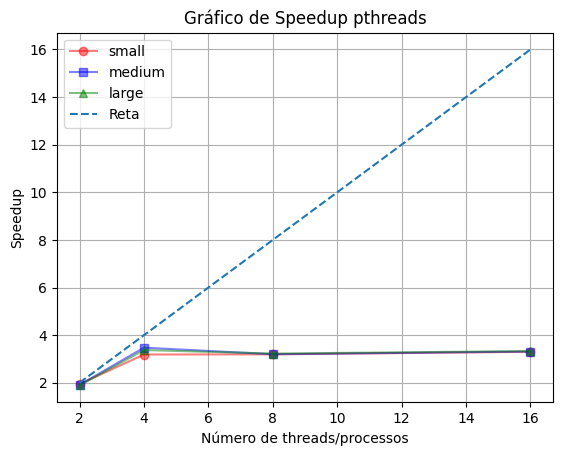

In [85]:
plt.plot(threads, speedups_pthreads[0], label='small', color='red', marker='o', alpha=0.5)
plt.plot(threads, speedups_pthreads[1], label='medium', color='blue', marker='s', alpha=0.5)
plt.plot(threads, speedups_pthreads[2], label='large', color='green', marker='^', alpha=0.5)

plt.plot(threads, threads, linestyle='--', label='Reta')

plt.xlabel('Número de threads/processos')
plt.ylabel('Speedup')
plt.title('Gráfico de Speedup pthreads')
plt.grid(True)
plt.legend()
plt.show()

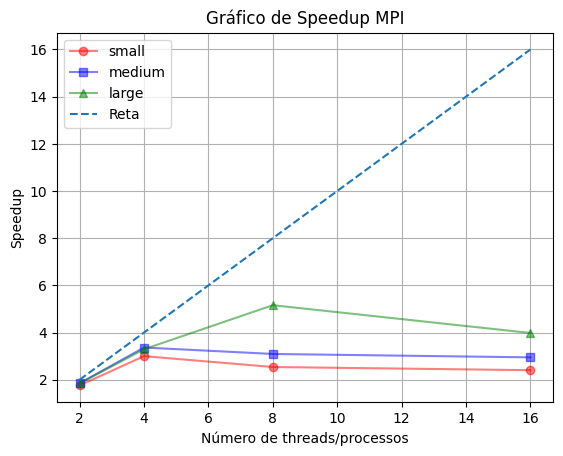

In [86]:
plt.plot(threads, speedups_mpi[0], label='small', color='red', marker='o', alpha=0.5)
plt.plot(threads, speedups_mpi[1], label='medium', color='blue', marker='s', alpha=0.5)
plt.plot(threads, speedups_mpi[2], label='large', color='green', marker='^', alpha=0.5)

plt.plot(threads, threads, linestyle='--', label='Reta')

plt.xlabel('Número de threads/processos')
plt.ylabel('Speedup')
plt.title('Gráfico de Speedup MPI')
plt.grid(True)
plt.legend()
plt.show()

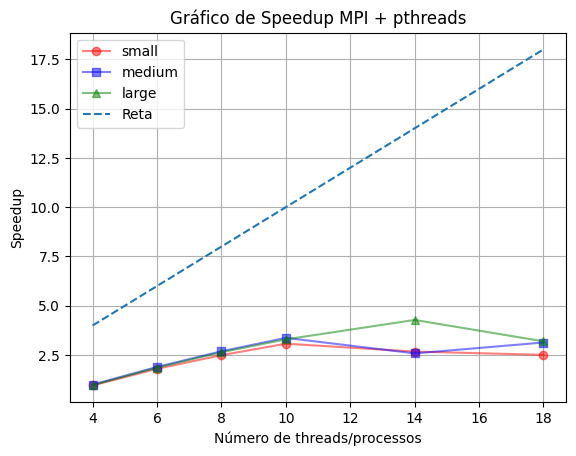

In [87]:
plt.plot(threads_mpi_pthreads, speedups_mpi_pthreads[0], label='small', color='red', marker='o', alpha=0.5)
plt.plot(threads_mpi_pthreads, speedups_mpi_pthreads[1], label='medium', color='blue', marker='s', alpha=0.5)
plt.plot(threads_mpi_pthreads, speedups_mpi_pthreads[2], label='large', color='green', marker='^', alpha=0.5)

plt.plot(threads_mpi_pthreads, threads_mpi_pthreads, linestyle='--', label='Reta')

plt.xlabel('Número de threads/processos')
plt.ylabel('Speedup')
plt.title('Gráfico de Speedup MPI + pthreads')
plt.grid(True)
plt.legend()
plt.show()

In [88]:
speedups_pthreads

[[1.9430866004806295,
  3.1855943502896293,
  3.1925706709590087,
  3.30024966812451],
 [1.9103268250316727,
  3.473573470408144,
  3.1979525736247085,
  3.312457856817047],
 [1.887706904901331,
  3.3735843548185973,
  3.2249636755563422,
  3.330284415806938]]

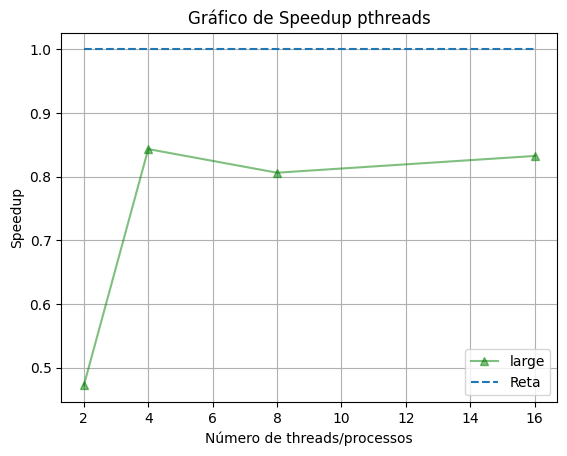

In [89]:
eficiencia_pthreads = []

for i in speedups_pthreads[2]:
    eficiencia_pthreads.append(i/nucleos)


plt.plot(threads, eficiencia_pthreads, label='large', color='green', marker='^', alpha=0.5)

plt.plot(threads, [1]*len(threads), linestyle='--', label='Reta')

plt.xlabel('Número de threads/processos')
plt.ylabel('Speedup')
plt.title('Gráfico de Speedup pthreads')
plt.grid(True)
plt.legend()
plt.show()

In [90]:
for i, t in enumerate(threads):
    print(f"{t} {eficiencia_pthreads[i]}")

2 0.47192672622533277
4 0.8433960887046493
8 0.8062409188890856
16 0.8325711039517345
